In [1]:
from math import sqrt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

2023-12-03 04:02:55.685863: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarni

In [2]:
! pip install openpyxl

dataset=pd.read_excel('./IMB881.xlsx', sheet_name = 'Data Order ONLY')
dataset.shape

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


(13135, 12)

In [3]:
dataset

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.2500,11.5425
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.0000,10.5300
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.0000,7.9200
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.0000,7.9200
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.0000,10.5300
...,...,...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51,80.00,51.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,80.0000,7.2000
13131,P-5,USA,41,40.00,41.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,40.0000,3.6000
13132,P-5,USA,23,108.00,23.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,108.0000,9.7200
13133,P-5,USA,22,140.00,22.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,140.0000,12.6000


In [4]:


columns_to_remove = ['QtyRequired', 'TotalArea', 'DesignName', 'AreaMtr']

# Creating a new DataFrame without the specified columns
dataset_clean= dataset.drop(columns=columns_to_remove)


In [5]:

def extract_first_word(text):
    words = str(text).split('/')
    if words:
        first_word = words[0]
        if not any(char.isdigit() for char in first_word):
            return first_word
    return 'outlier'

# Create a new column 'FirstWord' containing the extracted first word before '/'
dataset_clean['FirstWord'] = dataset_clean['ColorName'].apply(extract_first_word)

In [6]:
dataset_clean

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.2500,GREEN
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.0000,BEIGE
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.0000,BEIGE
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.0000,CHARCOAL
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.0000,NAVY
...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,80.0000,BLUE
13131,P-5,USA,41.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,40.0000,BLUE
13132,P-5,USA,23.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,108.0000,BLUE
13133,P-5,USA,22.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,140.0000,BLUE


In [7]:
# Count occurrences of each color
color_counts = dataset_clean['FirstWord'].value_counts()

# Create a dictionary to map colors with counts less than 50 to 'other'
colors_to_replace = color_counts[color_counts < 50].index.tolist()

# Create a new column 'FilteredColor' with colors having counts less than 50 replaced by 'other'
dataset_clean['Filteredcolor'] = dataset_clean['FirstWord'].apply(lambda x: 'other' if x in colors_to_replace else x)

In [8]:
dataset_clean

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord,Filteredcolor
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.2500,GREEN,GREEN
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.0000,BEIGE,BEIGE
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.0000,BEIGE,BEIGE
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.0000,CHARCOAL,CHARCOAL
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.0000,NAVY,NAVY
...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,80.0000,BLUE,BLUE
13131,P-5,USA,41.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,40.0000,BLUE,BLUE
13132,P-5,USA,23.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,108.0000,BLUE,BLUE
13133,P-5,USA,22.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,140.0000,BLUE,BLUE


In [9]:


# Create a new column 'FirstWordQuality' containing the extracted first word of each phrase divided by space
dataset_clean['FilteredQuality'] = dataset_clean['QualityName'].apply(extract_first_word)

In [10]:
dataset_clean.head()

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord,Filteredcolor,FilteredQuality
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.25,GREEN,GREEN,outlier
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.00,BEIGE,BEIGE,outlier
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.00,BEIGE,BEIGE,outlier
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.00,CHARCOAL,CHARCOAL,outlier
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.00,NAVY,NAVY,outlier


In [11]:
# Replace 0 values in 'Amount' and 'AreaFt' columns with NaN
dataset_clean['Amount'].replace(0, np.nan, inplace=True)
dataset_clean['AreaFt'].replace(0, np.nan, inplace=True)

In [12]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerCode     13135 non-null  object 
 1   CountryName      13135 non-null  object 
 2   Amount           12589 non-null  float64
 3   ITEM_NAME        13135 non-null  object 
 4   QualityName      13135 non-null  object 
 5   ColorName        13135 non-null  object 
 6   ShapeName        13135 non-null  object 
 7   AreaFt           13135 non-null  float64
 8   FirstWord        13135 non-null  object 
 9   Filteredcolor    13135 non-null  object 
 10  FilteredQuality  13135 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.1+ MB


In [13]:
# Impute missing values with the median for 'Amount' and 'AreaFt'
median_amount = dataset_clean['Amount'].median()
median_area = dataset_clean['AreaFt'].median()

dataset_clean['Amount'].fillna(median_amount, inplace=True)
dataset_clean['AreaFt'].fillna(median_area, inplace=True)

In [14]:
# Replace '-' with NaN in 'ITEM_NAME' column
dataset_clean['ITEM_NAME'].replace('-', np.nan, inplace=True)

# Remove rows with missing values in 'ITEM_NAME' column
dataset_clean.dropna(subset=['ITEM_NAME'], inplace=True)

In [15]:
dataset_clean['Amount_log'] = np.log(dataset_clean['Amount'])
dataset_clean['AreaFt_log'] = np.log(dataset_clean['AreaFt'])


In [16]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13131 entries, 0 to 13134
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerCode     13131 non-null  object 
 1   CountryName      13131 non-null  object 
 2   Amount           13131 non-null  float64
 3   ITEM_NAME        13131 non-null  object 
 4   QualityName      13131 non-null  object 
 5   ColorName        13131 non-null  object 
 6   ShapeName        13131 non-null  object 
 7   AreaFt           13131 non-null  float64
 8   FirstWord        13131 non-null  object 
 9   Filteredcolor    13131 non-null  object 
 10  FilteredQuality  13131 non-null  object 
 11  Amount_log       13131 non-null  float64
 12  AreaFt_log       13131 non-null  float64
dtypes: float64(4), object(9)
memory usage: 1.4+ MB


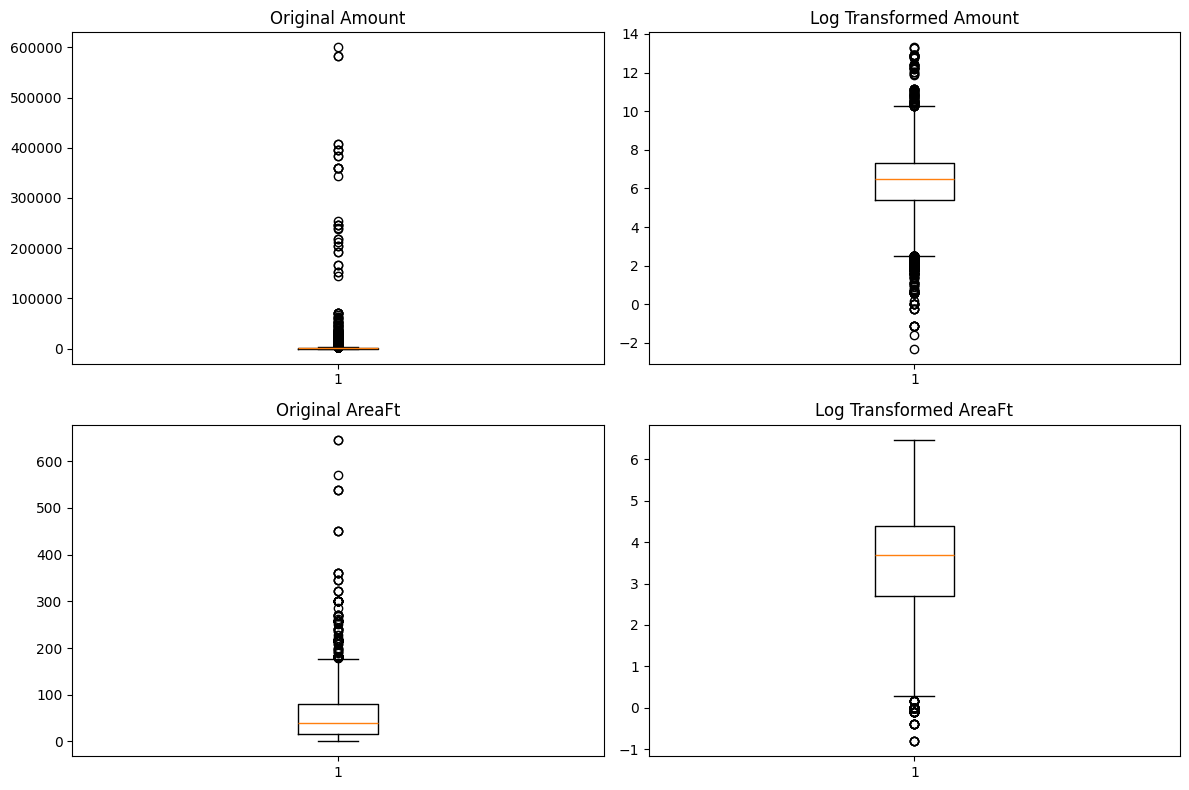

In [17]:
import matplotlib.pyplot as plt

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot for 'Amount'
axes[0, 0].boxplot(dataset_clean['Amount'].dropna())
axes[0, 0].set_title('Original Amount')

# Boxplot for 'Amount_log'
axes[0, 1].boxplot(dataset_clean['Amount_log'].dropna())
axes[0, 1].set_title('Log Transformed Amount')

# Boxplot for 'AreaFt'
axes[1, 0].boxplot(dataset_clean['AreaFt'].dropna())
axes[1, 0].set_title('Original AreaFt')

# Boxplot for 'AreaFt_log'
axes[1, 1].boxplot(dataset_clean['AreaFt_log'].dropna())
axes[1, 1].set_title('Log Transformed AreaFt')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [18]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the log-transformed features
dataset_clean[['Amount_log', 'AreaFt_log']] = scaler.fit_transform(
    dataset_clean[['Amount_log', 'AreaFt_log']]
)


In [19]:
# Displaying the head of the DataFrame
dataset_clean.head()

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord,Filteredcolor,FilteredQuality,Amount_log,AreaFt_log
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.25,GREEN,GREEN,outlier,0.573361,0.778011
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.00,BEIGE,BEIGE,outlier,0.567478,0.765403
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.00,BEIGE,BEIGE,outlier,0.559104,0.726284
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.00,CHARCOAL,CHARCOAL,outlier,0.559104,0.726284
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.00,NAVY,NAVY,outlier,0.555796,0.765403


In [20]:
# Calculate Total Revenue for Each Customer
customer_revenue = dataset_clean.groupby('CustomerCode')['Amount_log'].sum()

# Identify the Top 8 Customers
top_8_customers = customer_revenue.nlargest(8).index

# Use Customer Names as Class Labels
class_labels = {customer: f'Class_{i+1}' for i, customer in enumerate(top_8_customers)}

# Create a New Target Variable
dataset_clean['Class'] = dataset_clean['CustomerCode'].map(class_labels)

# Filter Dataset
top_8_df = dataset_clean[dataset_clean['CustomerCode'].isin(top_8_customers)].copy()

In [21]:
top_8_df

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord,Filteredcolor,FilteredQuality,Amount_log,AreaFt_log,Class
82,C-1,USA,62.5,HAND TUFTED,TUFTED 60C,ANTIQUE/IVORY,REC,62.5000,ANTIQUE,ANTIQUE,outlier,0.412497,0.679292,Class_5
83,C-1,USA,40.0,HAND TUFTED,TUFTED 60C,GREY/IVORY,REC,40.0000,GREY,GREY,outlier,0.383901,0.618001,Class_5
119,C-1,USA,1080.0,HAND TUFTED,TUFTED 60C+10C,IVORY/BLUE,REC,108.0000,IVORY,IVORY,outlier,0.595080,0.754410,Class_5
120,C-1,USA,864.0,HAND TUFTED,TUFTED 60C+10C,BLUE/IVORY,REC,108.0000,BLUE,BLUE,outlier,0.580782,0.754410,Class_5
121,C-1,USA,640.0,HAND TUFTED,TUFTED 60C+10C,BLUE/IVORY,REC,80.0000,BLUE,BLUE,outlier,0.561553,0.713195,Class_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,80.0000,BLUE,BLUE,outlier,0.399468,0.713195,Class_2
13131,P-5,USA,41.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,40.0000,BLUE,BLUE,outlier,0.385483,0.618001,Class_2
13132,P-5,USA,23.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,108.0000,BLUE,BLUE,outlier,0.348443,0.754410,Class_2
13133,P-5,USA,22.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,140.0000,BLUE,BLUE,outlier,0.345595,0.790050,Class_2


In [22]:
print("Top 8 Customers:")
for customer in top_8_customers:
    print(customer)

Top 8 Customers:
M-1
P-5
A-9
JL
C-1
TGT
H-2
T-2


In [23]:
# List of categorical features (excluding 'Amount_log' and 'AreaFt_log')
categorical_features = ['ITEM_NAME', 'ShapeName', 'Filteredcolor', 'FilteredQuality']

# List of numerical features
numerical_features = ['Amount_log', 'AreaFt_log']

# Extracting features from the DataFrame
X_categorical = top_8_df[categorical_features]

# One-hot encoding for categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, columns=categorical_features)

# Extracting numerical features
X_numerical = top_8_df[numerical_features]

# Concatenating the one-hot encoded categorical features with the numerical features
X = pd.concat([X_categorical_encoded, X_numerical], axis=1)

# Target variable
y = top_8_df['Class']


In [24]:

# Check for missing values in each column
print(top_8_df.isnull().sum())


CustomerCode       0
CountryName        0
Amount             0
ITEM_NAME          0
QualityName        0
ColorName          0
ShapeName          0
AreaFt             0
FirstWord          0
Filteredcolor      0
FilteredQuality    0
Amount_log         0
AreaFt_log         0
Class              0
dtype: int64


## Decision Tree

In [25]:




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Assess the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.90
              precision    recall  f1-score   support

     Class_1       0.96      0.95      0.96       485
     Class_2       0.88      0.91      0.90       348
     Class_3       0.77      0.73      0.75       241
     Class_4       0.92      0.95      0.93       206
     Class_5       0.83      0.81      0.82       213
     Class_6       0.95      0.94      0.94       118
     Class_7       0.88      0.87      0.88        95
     Class_8       0.96      0.98      0.97       130

    accuracy                           0.90      1836
   macro avg       0.89      0.89      0.89      1836
weighted avg       0.90      0.90      0.90      1836



## K-fold decision tree

In [26]:
# Initialize a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Define the number of splits for KFold
n_splits = 5  # You can adjust this number as needed

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Perform cross-validation
accuracy_scores = cross_val_score(dt_classifier, X, y, cv=kf, scoring='accuracy')

# Display accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculate and display the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("Mean accuracy:", mean_accuracy)


Accuracy scores for each fold: [0.89923747 0.89270153 0.88997821 0.88507625 0.89318801]
Mean accuracy: 0.8920362949902939


## Random forest

In [27]:


# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Convert the target variable y_train and y_test to 1D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
# Calculate the classification report with zero division handling
classification_report_results = classification_report(y_test, y_pred, zero_division=0)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_results)


Accuracy: 0.894880174291939
Classification Report:
               precision    recall  f1-score   support

     Class_1       0.92      0.96      0.94       485
     Class_2       0.91      0.89      0.90       348
     Class_3       0.78      0.78      0.78       241
     Class_4       0.93      0.94      0.93       206
     Class_5       0.86      0.81      0.83       213
     Class_6       0.92      0.92      0.92       118
     Class_7       0.85      0.86      0.86        95
     Class_8       0.95      0.97      0.96       130

    accuracy                           0.89      1836
   macro avg       0.89      0.89      0.89      1836
weighted avg       0.89      0.89      0.89      1836



## Random forest with bootstrap Aggregating 

In [28]:


# Assuming X_train, X_test, y_train, and y_test are your training and test sets

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

# Display results or print them
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_results)


Accuracy: 0.894880174291939
Classification Report:
               precision    recall  f1-score   support

     Class_1       0.92      0.96      0.94       485
     Class_2       0.91      0.89      0.90       348
     Class_3       0.78      0.77      0.77       241
     Class_4       0.93      0.94      0.93       206
     Class_5       0.86      0.81      0.83       213
     Class_6       0.92      0.92      0.92       118
     Class_7       0.86      0.85      0.86        95
     Class_8       0.95      0.97      0.96       130

    accuracy                           0.89      1836
   macro avg       0.89      0.89      0.89      1836
weighted avg       0.89      0.89      0.89      1836



## KNN with tunned K

In [29]:



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Example values for k

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN classifier using the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Model Evaluation on Testing Set
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred,zero_division=1)

print("Best k value:", best_k)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_results)


Best k value: 3
Accuracy: 0.8578431372549019
Classification Report:
               precision    recall  f1-score   support

     Class_1       0.89      0.93      0.91       497
     Class_2       0.85      0.89      0.87       351
     Class_3       0.77      0.73      0.75       248
     Class_4       0.86      0.92      0.89       195
     Class_5       0.88      0.72      0.79       234
     Class_6       0.75      0.81      0.78       101
     Class_7       0.89      0.88      0.88        96
     Class_8       0.92      0.95      0.93       114

    accuracy                           0.86      1836
   macro avg       0.85      0.85      0.85      1836
weighted avg       0.86      0.86      0.86      1836



## Logistic Regression

In [30]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a Logistic Regression Model
clf = LogisticRegression(multi_class='auto', max_iter=2000, random_state=42)
clf.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

# Interpret Results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_results)

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

     Class_1       0.79      0.87      0.83       497
     Class_2       0.78      0.77      0.78       351
     Class_3       0.70      0.57      0.63       248
     Class_4       0.53      0.45      0.49       195
     Class_5       0.74      0.64      0.69       234
     Class_6       0.50      0.70      0.58       101
     Class_7       0.73      0.71      0.72        96
     Class_8       0.83      0.96      0.89       114

    accuracy                           0.73      1836
   macro avg       0.70      0.71      0.70      1836
weighted avg       0.72      0.73      0.72      1836



## SVM

In [31]:

# Create the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred, zero_division=1)

# Display results or print them
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_results)



Accuracy: 0.7565359477124183
Classification Report:
               precision    recall  f1-score   support

     Class_1       0.81      0.89      0.84       497
     Class_2       0.81      0.86      0.83       351
     Class_3       0.72      0.65      0.69       248
     Class_4       0.73      0.56      0.63       195
     Class_5       0.72      0.62      0.67       234
     Class_6       0.47      0.71      0.56       101
     Class_7       0.88      0.51      0.64        96
     Class_8       0.83      0.96      0.89       114

    accuracy                           0.76      1836
   macro avg       0.75      0.72      0.72      1836
weighted avg       0.76      0.76      0.75      1836



## Neural Network

In [33]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded_categorical = to_categorical(y_encoded, num_classes=len(class_labels))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_categorical, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = (
    X_train.astype('float32'),
    X_test.astype('float32'),
    y_train.astype('float32'),
    y_test.astype('float32'),
)

# Build a Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(class_labels), activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate Model Performance
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_test_classes = label_encoder.inverse_transform(y_test.argmax(axis=1))
classification_report_results = classification_report(y_test_classes, y_pred_classes)

# Interpret Results
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report_results)


Epoch 1/20
184/184 [==============================] - 2s 5ms/step - loss: 1.7390 - accuracy: 0.3672 - val_loss: 1.3916 - val_accuracy: 0.5099
Epoch 2/20
184/184 [==============================] - 1s 4ms/step - loss: 1.3204 - accuracy: 0.5448 - val_loss: 1.0709 - val_accuracy: 0.6433
Epoch 3/20
184/184 [==============================] - 1s 4ms/step - loss: 1.0986 - accuracy: 0.6216 - val_loss: 0.9346 - val_accuracy: 0.6882
Epoch 4/20
184/184 [==============================] - 1s 4ms/step - loss: 1.0123 - accuracy: 0.6440 - val_loss: 0.8670 - val_accuracy: 0.6998
Epoch 5/20
184/184 [==============================] - 1s 4ms/step - loss: 0.9419 - accuracy: 0.6699 - val_loss: 0.8126 - val_accuracy: 0.7018
Epoch 6/20
184/184 [==============================] - 1s 4ms/step - loss: 0.8925 - accuracy: 0.6862 - val_loss: 0.7769 - val_accuracy: 0.7161
Epoch 7/20
184/184 [==============================] - 1s 4ms/step - loss: 0.8576 - accuracy: 0.6937 - val_loss: 0.7504 - val_accuracy: 0.7400
Epoch 